In [4]:
#!/usr/bin/env python3
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

print(pd.__version__)

1.2.4


In [5]:
df_rows = pd.read_csv("./taxi_dataset/training_data_simple.csv", sep='\n', nrows=5, header=None)
df_rows

,0
0,"1372638303,-8.587116,41.162427,-8.586198,41.16..."
1,"1372646650,-8.6103,41.153688,-8.610336,41.1536..."
2,"1372645583,-8.591301,41.156163,-8.592651,41.15..."
3,"1372651427,-8.610291,41.153625,-8.61093,41.153..."
4,"1372652856,-8.61372,41.148414,-8.614287,41.148..."


In [6]:
df = df_rows[0].str.split(',', expand=True)
df

,0,1,2,3,4,5,6,7,8,9,...,663,664,665,666,667,668,669,670,671,672
0,1372638303,-8.587116,41.162427,-8.586198,41.162112,-8.585982,41.161338,-8.585037,41.160024,-8.584146,...,,,,,,,,,,
1,1372646650,-8.6103,41.153688,-8.610336,41.153679,-8.610192,41.154039,-8.609985,41.154759,-8.609931,...,,,,,,,,,,
2,1372645583,-8.591301,41.156163,-8.592651,41.156163,-8.594415,41.156298,-8.594451,41.156316,-8.59446,...,,,,,,,,,,
3,1372651427,-8.610291,41.153625,-8.61093,41.153643,-8.611965,41.153859,-8.611938,41.154651,-8.611884,...,,,,,,,,,,
4,1372652856,-8.61372,41.148414,-8.614287,41.148414,-8.614431,41.148387,-8.614845,41.147451,-8.614872,...,,,,,,,,,,


In [7]:
df = df.iloc[:7,:7]
df

,0,1,2,3,4,5,6
0,1372638303,-8.587116,41.162427,-8.586198,41.162112,-8.585982,41.161338
1,1372646650,-8.6103,41.153688,-8.610336,41.153679,-8.610192,41.154039
2,1372645583,-8.591301,41.156163,-8.592651,41.156163,-8.594415,41.156298
3,1372651427,-8.610291,41.153625,-8.61093,41.153643,-8.611965,41.153859
4,1372652856,-8.61372,41.148414,-8.614287,41.148414,-8.614431,41.148387


In [8]:
df.columns = ["start_time", "lon_1", "lat_1", "lon_2", "lat_2", "lon_3", "lat_3"]
print(df.columns)
df

Index(['start_time', 'lon_1', 'lat_1', 'lon_2', 'lat_2', 'lon_3', 'lat_3'], dtype='object')


,start_time,lon_1,lat_1,lon_2,lat_2,lon_3,lat_3
0,1372638303,-8.587116,41.162427,-8.586198,41.162112,-8.585982,41.161338
1,1372646650,-8.6103,41.153688,-8.610336,41.153679,-8.610192,41.154039
2,1372645583,-8.591301,41.156163,-8.592651,41.156163,-8.594415,41.156298
3,1372651427,-8.610291,41.153625,-8.61093,41.153643,-8.611965,41.153859
4,1372652856,-8.61372,41.148414,-8.614287,41.148414,-8.614431,41.148387


In [9]:
df_transposed = df.transpose()
print(df_transposed)
print()
print(df_transposed.columns)

                     0           1           2           3           4
start_time  1372638303  1372646650  1372645583  1372651427  1372652856
lon_1        -8.587116     -8.6103   -8.591301   -8.610291    -8.61372
lat_1        41.162427   41.153688   41.156163   41.153625   41.148414
lon_2        -8.586198   -8.610336   -8.592651    -8.61093   -8.614287
lat_2        41.162112   41.153679   41.156163   41.153643   41.148414
lon_3        -8.585982   -8.610192   -8.594415   -8.611965   -8.614431
lat_3        41.161338   41.154039   41.156298   41.153859   41.148387

RangeIndex(start=0, stop=5, step=1)


In [10]:
col1 = df_transposed.iloc[:,0]
col1

df_col1 = df_transposed.take([0], axis=1)
df_col1

,0
start_time,1372638303
lon_1,-8.587116
lat_1,41.162427
lon_2,-8.586198
lat_2,41.162112
lon_3,-8.585982
lat_3,41.161338


In [11]:
df_row1 = df.head(1)
df_row1

,start_time,lon_1,lat_1,lon_2,lat_2,lon_3,lat_3
0,1372638303,-8.587116,41.162427,-8.586198,41.162112,-8.585982,41.161338


In [12]:
data_plot = {   'start_time': [df_row1.start_time[0], int(df_row1.start_time)+15, int(df_row1.start_time)+30],
                'lon'       : [df_row1.lon_1[0], df_row1.lon_2[0], df_row1.lon_3[0]],
                'lat'       : [df_row1.lat_1[0], df_row1.lat_2[0], df_row1.lat_3[0]]
        }
df_plot = pd.DataFrame(data_plot)
df_plot

,start_time,lon,lat
0,1372638303,-8.587116,41.162427
1,1372638318,-8.586198,41.162112
2,1372638333,-8.585982,41.161338


Text(0.5, 0, 'Y_Gaze')

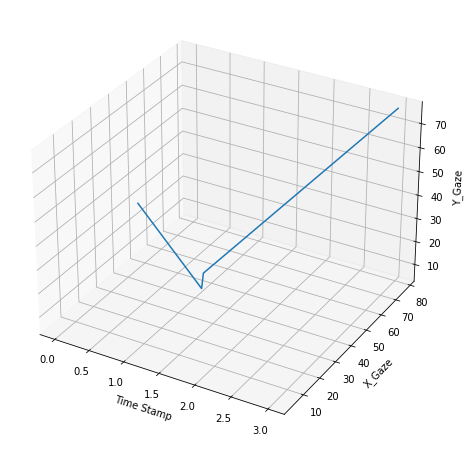

In [13]:
DF0 = pd.DataFrame(np.random.uniform(0,100,(4,2)), columns=['x', 'y'])  
pupil_rads = pd.Series(np.random.randint(1,10,(4)))  
#pupil^2 otherwise we won't see much of a difference in markersize
DF0["pupil_radius"] = np.square(pupil_rads)

gph = plt.figure(figsize=(15,8)).gca(projection='3d')
#plotting red dotted lines with tiny markers
gph.plot(DF0.index, DF0.x, DF0.y)

gph.set_xlabel('Time Stamp')
gph.set_ylabel('X_Gaze')
gph.set_zlabel('Y_Gaze')

In [14]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

[-8.587116 -8.586198 -8.585982]
[41.162426 41.162113 41.16134 ]
[1.3726383e+09 1.3726383e+09 1.3726383e+09]


Text(0.5, 0, 'Time')

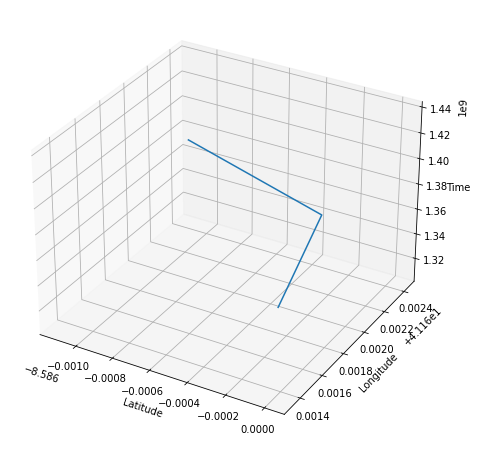

In [18]:
gph = plt.figure(figsize=(15,8)).gca(projection='3d')
# gph.scatter(DF0.index, DF0['x'], DF0['y'])

lon = np.array(df_plot.lon, dtype=np.float32)
print(lon)
lat = np.array(df_plot.lat, dtype=np.float32)
print(lat)
time = np.array(df_plot.start_time, dtype=np.float32)
print(time)

gph.plot3D(lon, lat, time)

gph.set_ylabel('Longitude')
gph.set_xlabel('Latitude')
gph.set_zlabel('Time')


In [16]:
def cal_dis(lat_1,lon_1,lat_2,lon_2):
    lon_1 = lon_1 * math.pi / 180
    lat_1 = lat_1 * math.pi / 180
    lon_2 = lon_2 * math.pi / 180
    lat_2 = lat_2 * math.pi / 180
    a = abs(lat_1 - lat_2)
    b = abs(lon_1 - lon_2)
    d = 2 * 6378.137 * np.arcsin(
        np.sqrt(np.sin(a / 2) * np.sin(a / 2) + np.cos(lat_1) * np.cos(lat_2) * np.sin(b / 2) * np.sin(b / 2)))
    return d

map_size = cal_dis(lat_1=41.14478, lon_1=-8.69346, lat_2=41.18652, lon_2=-8.57804)
print(map_size)

10.730629891298685
